<a href="https://colab.research.google.com/github/theashleypoole/CE203N/blob/main/Ashley_Poole_Problem_Set_1_TOA_Fluxes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Xarray Fundamentals with Atmospheric Radiation Data

In this assignment, we will use Xarray to analyze top-of-atmosphere radiation data from [NASA's CERES project](https://ceres.larc.nasa.gov/).

<img src="https://upload.wikimedia.org/wikipedia/commons/b/bb/The-NASA-Earth%27s-Energy-Budget-Poster-Radiant-Energy-System-satellite-infrared-radiation-fluxes.jpg" width=65%>

_Public domain, by NASA, from Wikimedia Commons_


A pre-downloaded and subsetted a portion of the CERES dataset is available here: http://ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc. The size of the data file is 702.53 MB. It may take a few minutes to download.

Please review the CERES [FAQs](https://ceres.larc.nasa.gov/resources/faqs) before getting started.

For an xarray review, see this [tutorial](https://earth-env-data-science.github.io/lectures/xarray/xarray_intro.html)
and the [xarray documentation.](https://xarray.pydata.org/en/stable/index.html)

Start by importing Numpy, Matplotlib, and Xarray. Set the default figure size to (12, 6).

In [1]:
import numpy as np
import matplotlib as mpl
import xarray as xr
import matplotlib.pyplot as plt

#plt.figure()
#fig = mpl.pyplot.figure(figsize=(12,6))
plt.rcParams['figure.figsize'] = (12,6)
#fig = plt.figure(figsize=(12,6))


Next, download the NetCDF file using wget.

In [2]:
! pip install wget

In [3]:
import wget
url = 'http://ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc'
filename = wget.download(url)
print(filename)

CERES_EBAF-TOA_Edition4.0_200003-201701.condensed (10).nc


## 1.1) Open the dataset and display its contents 


In [4]:
! pip install netcdf4

In [5]:
import netCDF4 as nc
ds = nc.Dataset("./"+filename)
#ds = xr.open_dataset(filename)
#file_ob = [fs.open(file) for file in file_location] 

In [6]:
print(ds)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    title: CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Monthly Averages and 07/2005 to 06/2015 Climatology.
    institution: NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions: CF-1.4
    comment: Data is from East to West and South to North.
    Version: Edition 4.0; Release Date March 7, 2017
    Fill_Value: Fill Value is -999.0
    DOI: 10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files: List of files used in creating the present Master netCDF file:
/homedir/nloeb/ebaf/monthly_means/adj_fluxes/deliverable/sw*.gz
/homedir/nloeb/ebaf/monthly_means/adj_fluxes/deliverable/lw*.gz
/homedir/nloeb/ebaf/monthly_means/adj_fluxes/deliverable/net*.gz
/homedir/nloeb/ebaf/monthly_means/adj_fluxes/deliverable/solflx*.gz
/homedir/nloeb/ebaf/monthly_means/out_glob.dat
    dimensions(sizes): lon(360), lat(180), time(203)
    variables(dimensions): float32 lon(lon), 

## 1.2) Print out the `long_name` attribute of each variable
Print `variable`: `long name` for each variable. Format the output so that the start of the `long name` attributes are aligned. 

In [7]:
for var in ds.variables.values():
    print(var.long_name)

longitude
Top of The Atmosphere Shortwave Flux, Monthly Means, All-Sky conditions
Top of The Atmosphere Longwave Flux, Monthly Means, All-Sky conditions
Top of The Atmosphere Net Flux, Monthly Means, All-Sky conditions
Top of The Atmosphere Shortwave Flux, Monthly Means, Clear-Sky conditions
Top of The Atmosphere Longwave Flux, Monthly Means, Clear-Sky conditions
Top of The Atmosphere Net Flux, Monthly Means, Clear-Sky conditions
Top of The Atmosphere Cloud Radiative Effects Shortwave Flux, Monthly Means
Top of The Atmosphere Cloud Radiative Effects Longwave Flux, Monthly Means
Top of The Atmosphere Cloud Radiative Effects Net Flux, Monthly Means
Incoming Solar Flux, Monthly Means
Cloud Area Fraction, Monthly Means, Daytime-and-Nighttime conditions
Cloud Effective Pressure, Monthly Means, Daytime-and-Nighttime conditions
Cloud Effective Temperature, Monthly Means, Daytime-and-Nighttime conditions
Cloud Visible Optical Depth, Monthly Means, Daytime conditions
time
latitude


In [8]:
#for var in ds.variables.values():
#    print(var)

In [9]:
for dim in ds.dimensions.values():
    print(dim)

<class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 360
<class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 180
<class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 203


## 2.1) Calculate the time-mean of the entire dataset

In [10]:
dss = xr.open_dataset(filename)
print(dss)

<xarray.Dataset>
Dimensions:                      (lat: 180, lon: 360, time: 203)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables:
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    toa_cre_sw_mon               (time, lat, lon) float32 ...
    toa_cre_lw_mon               (time, lat, lon) float32 ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_m

In [11]:
lon = ds['lon'][:]
#print(lon)
lat = ds['lat'][:]
#print(lat)
time = ds['time'][:]
tt = len(time)
#print(time)

In [12]:
dss_mean = dss.mean(dim=('time'))

## 2.2) From this, make a 2D plot of the the time-mean TOA longwave, shortwave, and solar radiation
(All-Sky conditions)

Note the sign conventions on each variable.

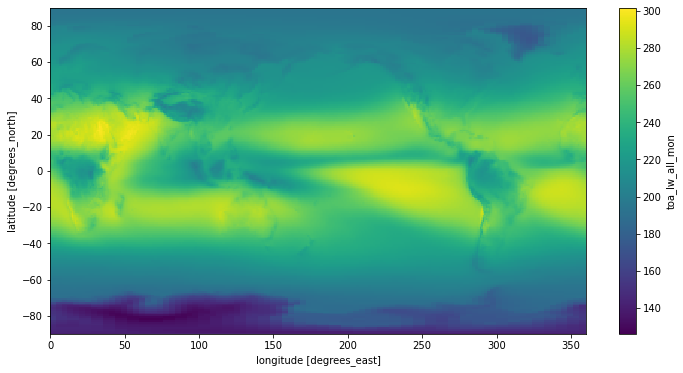

In [13]:
plt.rcParams['figure.figsize'] = (12,6)
dss.toa_lw_all_mon.mean(dim=('time')).plot()

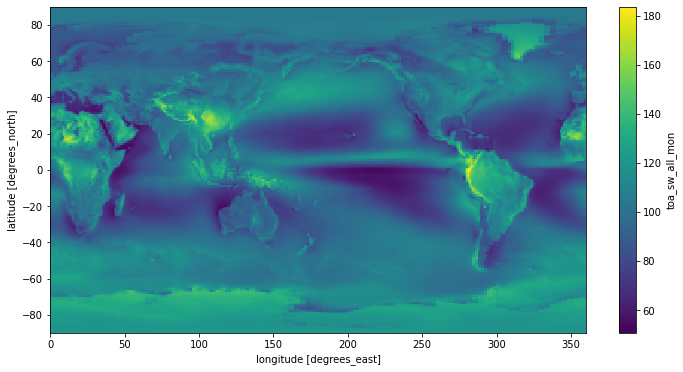

In [14]:
dss.toa_sw_all_mon.mean(dim=('time')).plot()

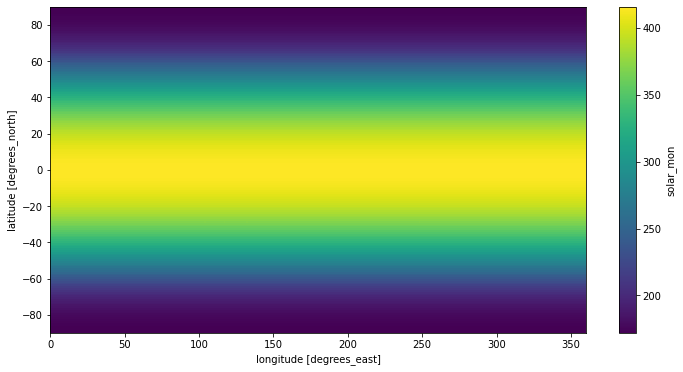

In [15]:
dss.solar_mon.mean(dim=('time')).plot()

## 2.3) Add up the three variables above and verify (visually) that they are equivalent to the TOA net flux

You have to pay attention to and think carefully about the sign conventions for each variable in order to get this to work.

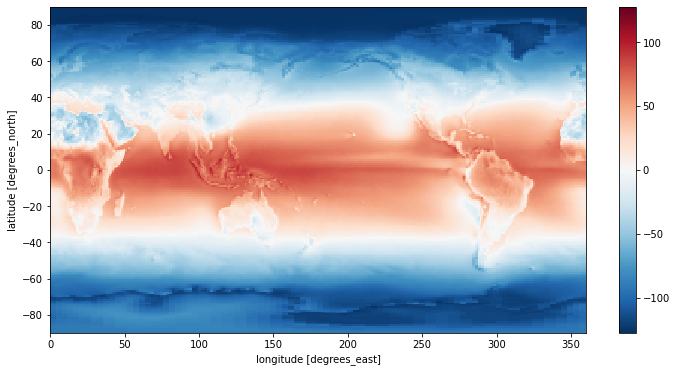

In [16]:
(-dss.toa_lw_all_mon.mean(dim=('time'))-dss.toa_sw_all_mon.mean(dim=('time'))+dss.solar_mon.mean(dim=('time'))).plot()

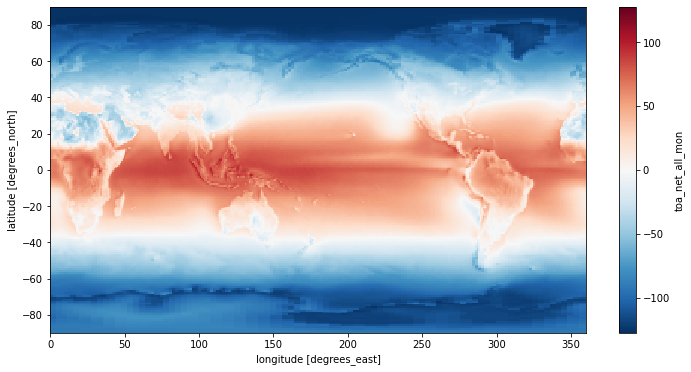

In [17]:
dss.toa_net_all_mon.mean(dim=('time')).plot()

In [18]:
dss.toa_lw_all_mon.mean(dim=('time'))+dss.toa_sw_all_mon.mean(dim=('time'))
dss.toa_net_all_mon.mean(dim=('time'))

<xarray.DataArray 'toa_net_all_mon' (lat: 180, lon: 360)>
array([[ -91.287636,  -91.287636,  -91.287636, ...,  -91.287636,
         -91.287636,  -91.287636],
       [ -91.45633 ,  -91.45633 ,  -91.45633 , ...,  -91.45633 ,
         -91.45633 ,  -91.45633 ],
       [ -91.82986 ,  -91.82986 ,  -91.82986 , ...,  -91.82986 ,
         -91.82986 ,  -91.82986 ],
       ...,
       [-125.825096, -125.825096, -125.825096, ..., -125.825096,
        -125.825096, -125.825096],
       [-125.93955 , -125.93955 , -125.93955 , ..., -125.93955 ,
        -125.93955 , -125.93955 ],
       [-126.26464 , -126.26464 , -126.26464 , ..., -126.26464 ,
        -126.26464 , -126.26464 ]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

## 3.1) Calculate the global mean of TOA net radiation directly from the dataset

Since the Earth is approximately in radiative balance, the net TOA radiation should be zero. But taking the naive mean from this dataset, you should find a number far from zero. Why?

In [19]:
dss.toa_net_all_mon.mean(dim=('time','lat','lon'))

<xarray.DataArray 'toa_net_all_mon' ()>
array(-28.729034, dtype=float32)

The naive mean does not take the net radiation from each day so these values averaged do not add up to zero.

The answer is that each "pixel" or "grid point" of this dataset does not represent an equal area of Earth's surface. So naively taking the mean, i.e. giving equal weight to each point, gives the wrong answer.

On a lat / lon grid, the relative area of each grid point is proportional to $\cos(\lambda)$. ($\lambda$ is latitude)

## 3.2) Create a `weight` array proportional to $\cos(\lambda)$ with a mean value of 1

Verify its mean is 1 and plot it. Be careful about radians vs. degrees.

In [20]:
#lon = dss['lon'][:]
#llon = len(lon)
#print(llon)
#lat = dss['lat'][:]
#llat = len(lat)
#print(llat)
#time = dss['time'][:]
#tt = len(time)
#print(tt)
#print(time)
#xr.dims(dss)
#weight = cos()

In [21]:
#weighted = dss.assign(weight=dss['toa_cre_lw_mon'*0 + np.cos(lat)])
dss = dss.assign(weight=lambda x: np.cos(x.toa_net_all_mon.lat*(np.pi/180)))
print(dss.weight.mean())

<xarray.DataArray 'weight' ()>
array(0.63662785, dtype=float32)


In [22]:
dss = dss.assign(weight_norm=lambda x: x.weight*(1/dss.weight.mean()))
print(dss.weight_norm.mean())

<xarray.DataArray 'weight_norm' ()>
array(1.00000001)


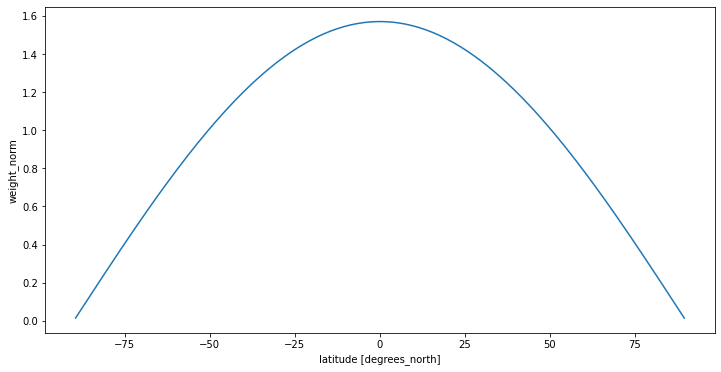

In [23]:
dss.weight_norm.plot()

## 3.3) Redo your global mean TOA net radiation calculation with this weight factor

Remember Xarray's [handling of broadcasting](http://xarray.pydata.org/en/stable/computation.html#broadcasting-by-dimension-name). Don't make this harder than it needs to be.

In [24]:
dss = dss.assign(toa_net_all_mon_norm=lambda x: x.toa_net_all_mon*x.weight_norm)
#print(dss.toa_net_all_mon_norm)

In [25]:
dss.toa_net_all_mon_norm.mean(dim=('time','lat','lon'))

<xarray.DataArray 'toa_net_all_mon_norm' ()>
array(0.87808886)

This time around, you should have found something much closer to zero. Ask a climate scientist what the net energy imbalance of Earth due to global warming is estimate to be. Do you think our calculation is precise enough to detect this? 

## 3.4) Now that you have a `weight` factor, verify that the TOA incoming solar, outgoing longwave, and outgoing shortwave approximately match up with infographic shown in the first cell of this assignment

In [26]:
dss = dss.assign(toa_sw_all_mon_norm=lambda x: x.toa_sw_all_mon*x.weight_norm)
dss.toa_sw_all_mon_norm.mean(dim=('time','lat','lon'))

<xarray.DataArray 'toa_sw_all_mon_norm' ()>
array(99.13904357)

In [27]:
dss = dss.assign(toa_lw_all_mon_norm=lambda x: x.toa_lw_all_mon*x.weight_norm)
dss.toa_lw_all_mon_norm.mean(dim=('time','lat','lon'))

<xarray.DataArray 'toa_lw_all_mon_norm' ()>
array(240.26798844)

In [28]:
dss = dss.assign(solar_mon_norm=lambda x: x.solar_mon*x.weight_norm)
dss.solar_mon_norm.mean(dim=('time','lat','lon'))

<xarray.DataArray 'solar_mon_norm' ()>
array(340.28512748)

We can go beyond a weight factor and actually calculate the area of each pixel of the dataset, using the formula

$$ dA = R^2 \cos(\lambda) d\lambda d \varphi $$

where $d\lambda$ and $d\varphi$ are the spacing of the points in latitude and longitude (measured in radians). We can approximate Earth's radius as $R = 6,371$ km.

## 4.1) calculate the pixel area using this formula and create a 2D (lon, lat) DataArray for it

(Xarray's `ones_like` function can help you easily create and broadcast DataArrays.) Verify that the sum of all the pixels equals the Earth's true surface area as evaluated using the formula for the area of a sphere (yes, the Earth is not a sphere ... it's just a homework problem).

In [29]:
R = 6371 #km
R2 = np.square(R)
dl = 1*(np.pi/180)
dp = 1*(np.pi/180)
#dl = np.absolute(dss['lat'][0]-dss['lat'][1])
#dp = np.absolute(dss['lon'][0]-dss['lon'][1])
print(dl)
print(dp)
print(R2)

0.017453292519943295
0.017453292519943295
40589641


In [30]:
dss = dss.assign(pixel=lambda x: R2*(np.cos(x.toa_net_all_mon.lat*(np.pi/180)))*dl*dp+(x.toa_net_all_mon.lon*0))
print(dss.pixel.sum())

<xarray.DataArray 'pixel' ()>
array(5.1007095e+08)


In [31]:
#dss.pixel

In [32]:
SA = 4*np.pi*R2
print(SA)

510064471.90978825


Multiplying the pixel area from above with the radiative flux gives you the total amount of radiation absorbed in each pixel

## 4.2) Calculate and plot the total amount of net radiation in each 1-degree latitude band

Label with correct units

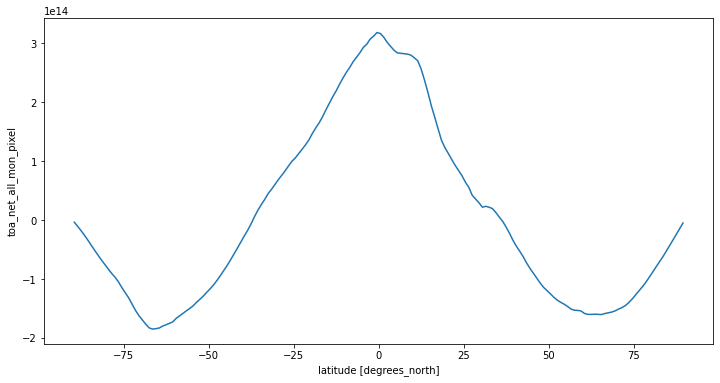

In [33]:
dss = dss.assign(toa_net_all_mon_pixel=lambda x: x.toa_net_all_mon*(1e6)*x.pixel)
toa_net_all_mon_pixel_mean = dss.toa_net_all_mon_pixel.mean(dim='time')
toa_net_all_mon_pixel_mean.sum(dim='lon').plot()

## 4.3) Plot the cumulative sum in latitude of that quantity

Label with correct units. (Hint: check out xarray's [cumsum](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.cumsum.html) function.)

This curve tells you how much energy must be transported meridionally by the ocean and atmosphere in order to account for the radiative imbalance at the top of the atmosphere.

Not sure what quantites we are supposed to plot that is different from above.

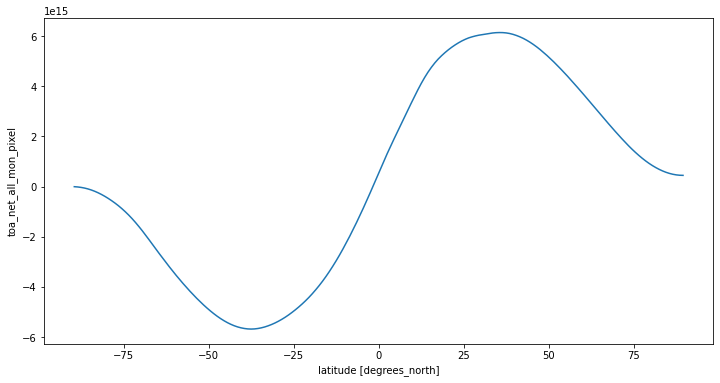

In [34]:
toa_net_all_mon_pixel_mean.sum(dim='lon').cumsum().plot()

You should get a curve that looks something like this: http://www.cgd.ucar.edu/cas/papers/jclim2001a/Fig7.html

## 5.1) Plot the time-mean cloud area fraction (day and night)

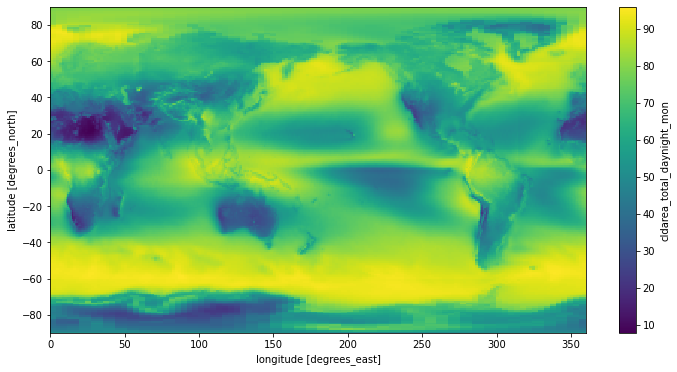

In [35]:
dss.cldarea_total_daynight_mon.mean(dim=('time')).plot()


## 5.2) Define boolean masks for low cloud area ($\le$ 25%) and high cloud area ($\ge$ 75%)

Use the whole dataset, not the time mean.

In [36]:
#print(dss.cldarea_total_daynight_mon)

In [37]:
dss = dss.assign(low_cloud = dss.cldarea_total_daynight_mon<=25)
#print(dss.low_cloud)
dss = dss.assign(high_cloud = dss.cldarea_total_daynight_mon>=75)
#print(dss.high_cloud)

## 5.3) Calculate and plot composites of time-mean outgoing shortwave and longwave radiation for low and high cloud area regions

Your results should be 2D maps.

Xarray's [where](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.where.html) function will be helpful. This may generate a warning regarding the mean of an empty slice which you can ignore.

In [38]:
low_cloud_sw = dss.low_cloud * dss.toa_sw_all_mon
low_cloud_lw = dss.low_cloud * dss.toa_lw_all_mon
#print(low_cloud_sw)
high_cloud_sw = dss.high_cloud * dss.toa_sw_all_mon
high_cloud_lw = dss.high_cloud * dss.toa_lw_all_mon

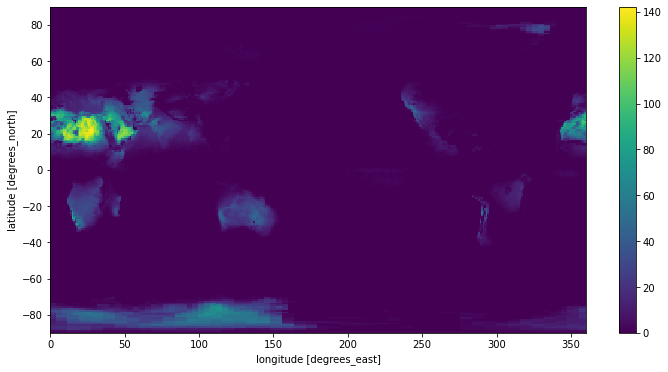

In [39]:
low_cloud_sw.mean(dim=('time')).plot()

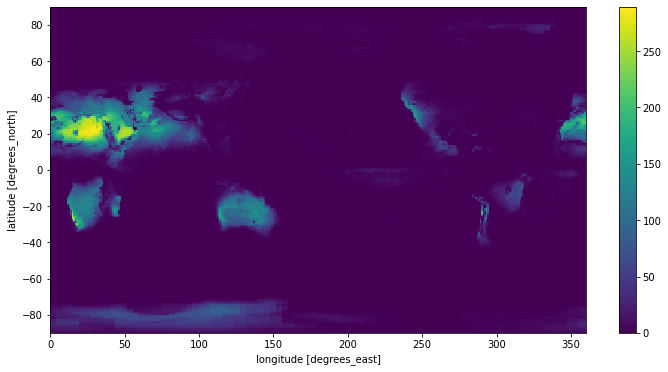

In [40]:
low_cloud_lw.mean(dim=('time')).plot()

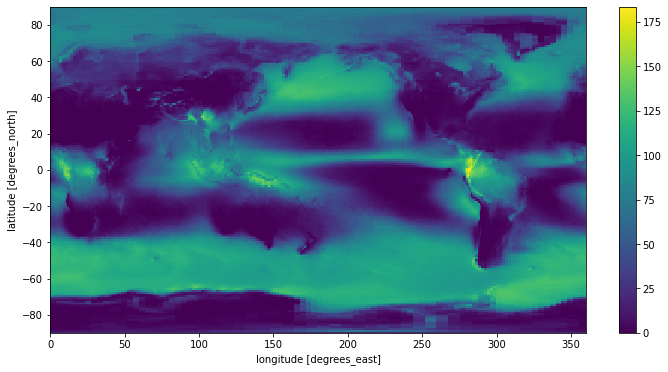

In [41]:
high_cloud_sw.mean(dim=('time')).plot()

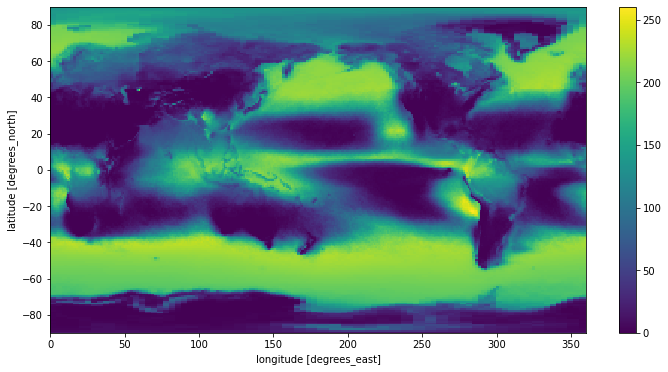

In [42]:
high_cloud_lw.mean(dim=('time')).plot()

## 5.4) Using the `weight` factor from 3.2, calculate the global mean values of shortwave and longwave radiation, composited in high and low cloud regions

In [43]:
low_cloud_sw_norm = dss.weight_norm * low_cloud_sw
low_cloud_lw_norm = dss.weight_norm * low_cloud_lw
high_cloud_sw_norm = dss.weight_norm * high_cloud_sw
high_cloud_lw_norm = dss.weight_norm * high_cloud_lw

In [44]:
low_cloud_sw_norm.mean(dim=('time','lat','lon'))

<xarray.DataArray ()>
array(3.96558191)

In [45]:
low_cloud_lw_norm.mean(dim=('time','lat','lon'))

<xarray.DataArray ()>
array(12.19367245)

In [46]:
high_cloud_sw_norm.mean(dim=('time','lat','lon'))

<xarray.DataArray ()>
array(48.8202363)

In [47]:
high_cloud_lw_norm.mean(dim=('time','lat','lon'))

<xarray.DataArray ()>
array(96.1322632)

What is the overall effect of clouds on shortwave and longwave radiation?

Since the radiation is much less for the low cloud cover conditions compared to the high cloud conditions, this shows that the clouds reflect a lot of radiation back into the atmosphere. 